In [5]:
!pip install -q yfinance

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime
import yfinance as yf

# List of tech companies
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Setting the date range
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Downloading stock data
company_list = []
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for stock, com_name in zip(tech_list, company_name):
    company_data = yf.download(stock, start=start, end=end)
    company_data["company_name"] = com_name
    company_list.append(company_data)

# Concatenating all company data into a single DataFrame
df = pd.concat(company_list, axis=0)
print(df.tail(10))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-12-26  228.500000  228.500000  226.669998  227.050003  227.050003   
2024-12-27  225.600006  226.029999  220.899994  223.750000  223.750000   
2024-12-30  220.059998  223.000000  218.429993  221.300003  221.300003   
2024-12-31  222.970001  223.229996  218.940002  219.389999  219.389999   
2025-01-02  222.029999  225.149994  218.190002  220.220001  220.220001   
2025-01-03  222.509995  225.360001  221.619995  224.190002  224.190002   
2025-01-06  226.779999  228.839996  224.839996  227.610001  227.610001   
2025-01-07  227.899994  228.380005  221.460007  222.110001  222.110001   
2025-01-08  223.190002  223.520004  220.199997  222.130005  222.130005   
2025-01-10  221.460007  221.710007  216.500000  218.720001  218.720001   

              Volume company_name  
Date                               
2024-12-26  16146700       AMAZON  
202

In [9]:
AAPL = df[df["company_name"] == "APPLE"]
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,208.380932,210.335318,206.600199,208.591389,208.176901,5.661978e+07
std,25.667935,25.886290,25.425663,25.784730,25.997840,3.087559e+07
min,165.350006,166.399994,164.080002,165.000000,164.405121,2.323470e+07
25%,184.982494,186.352497,182.610004,184.527504,183.854744,4.125762e+07
50%,216.344994,219.395004,214.559998,217.139999,216.775780,4.943365e+07
75%,228.059998,229.742504,225.739998,228.022503,227.821842,6.253268e+07
max,258.190002,260.100006,257.630005,259.019989,259.019989,3.186799e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-10 to 2025-01-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


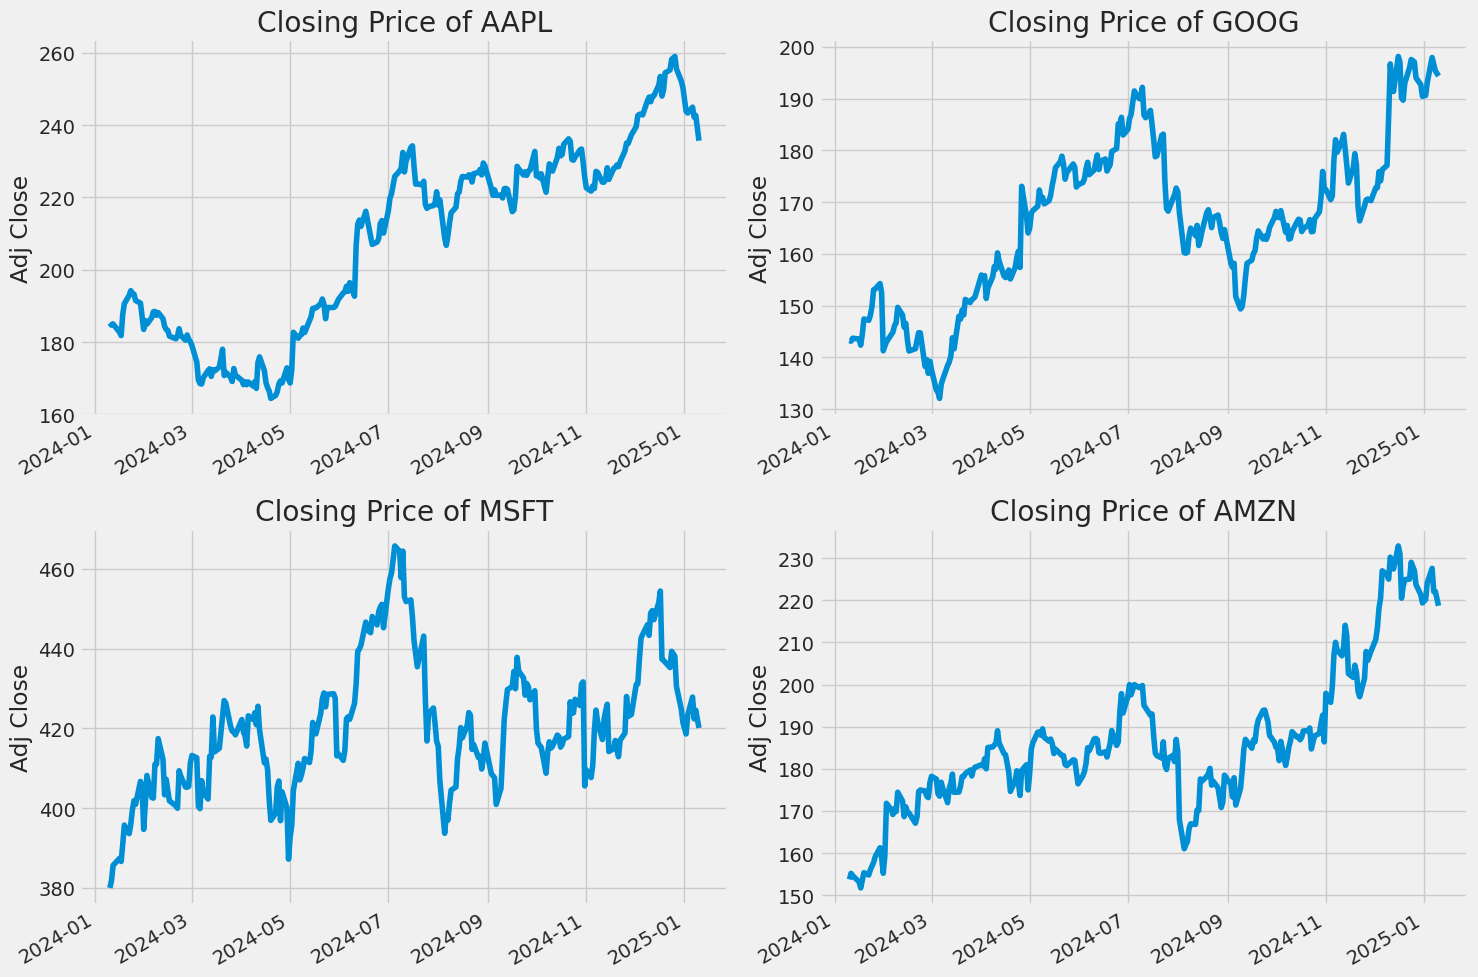

In [11]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

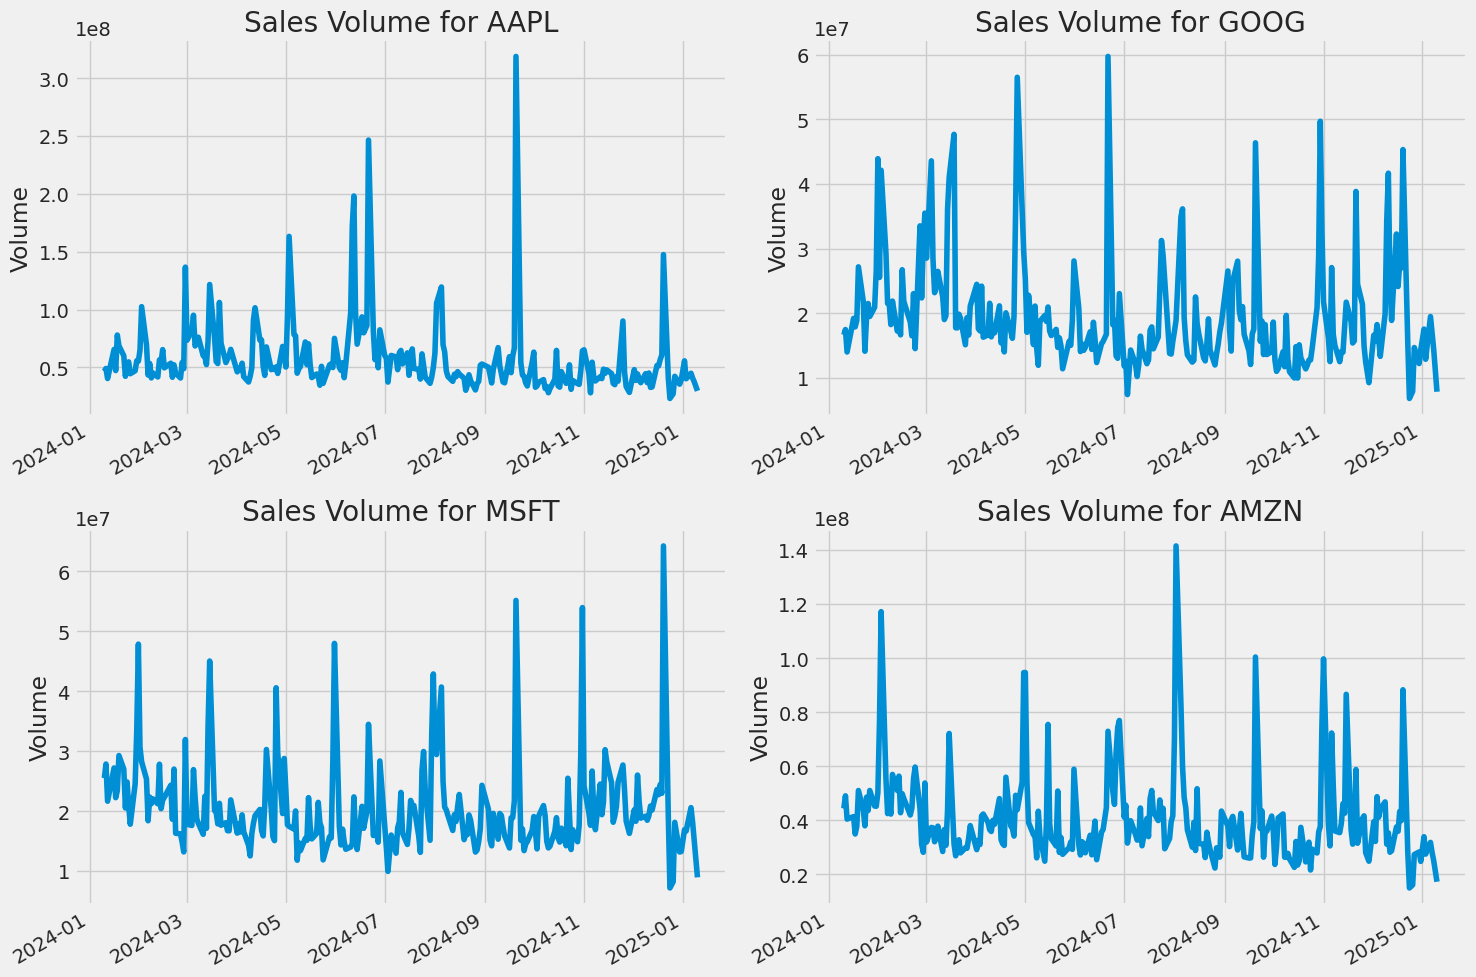

In [12]:
# Ploting the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

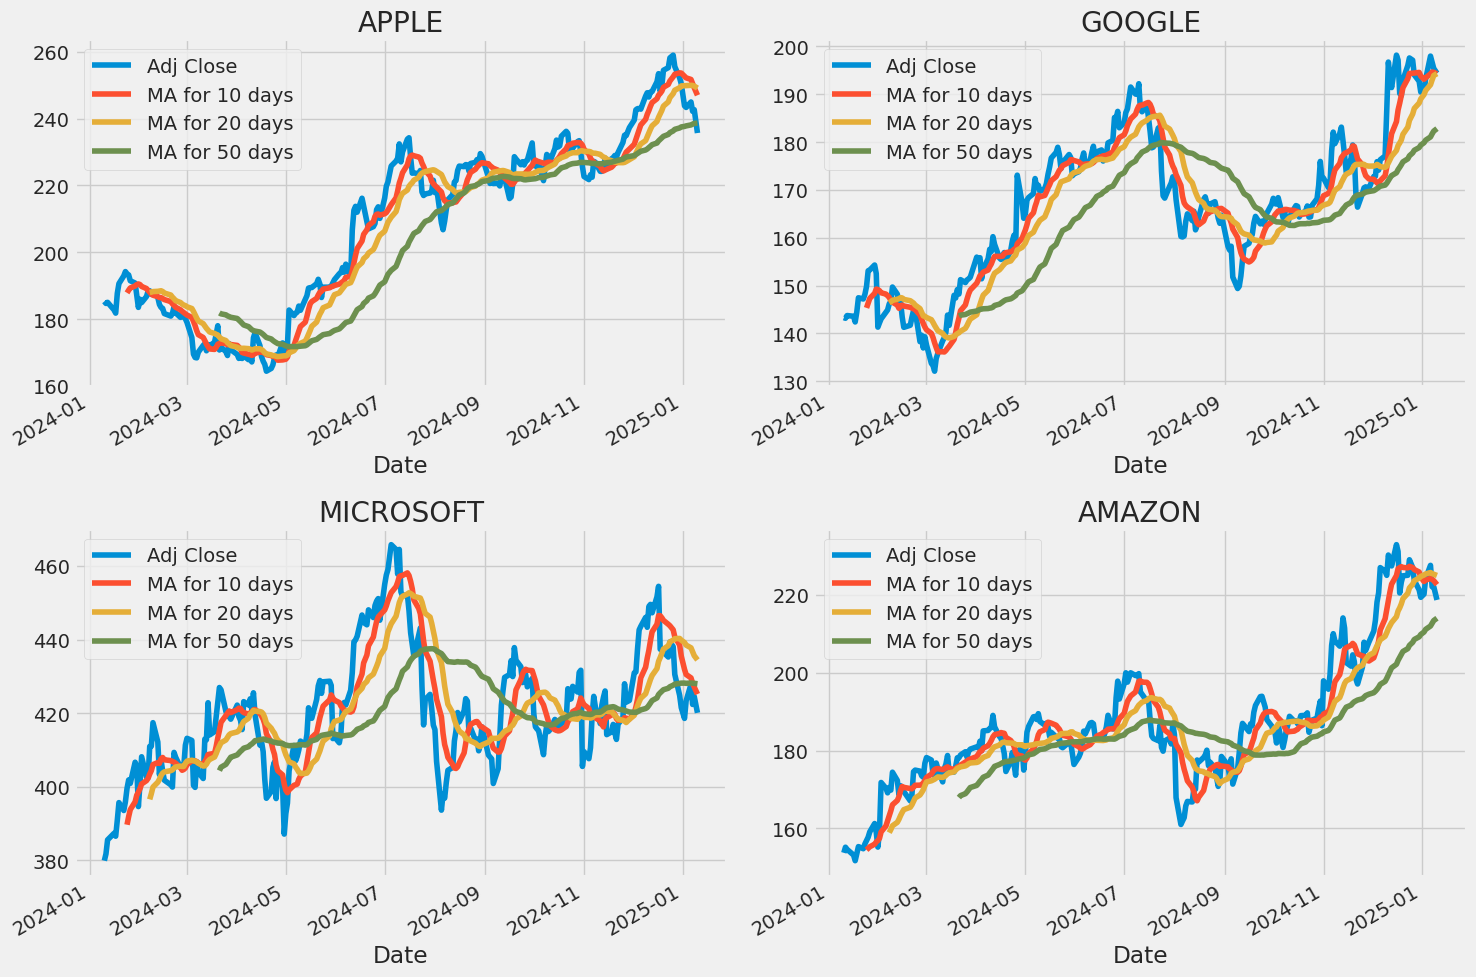

In [14]:
ma_day = [10, 20, 50]

# Calculate moving averages for the combined DataFrame
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df.groupby("company_name")["Adj Close"].transform(lambda x: x.rolling(ma).mean())

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for ax, company in zip(axes.flatten(), company_name):
    company_data = df[df["company_name"] == company]
    company_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
    ax.set_title(company)

fig.tight_layout()
plt.show()


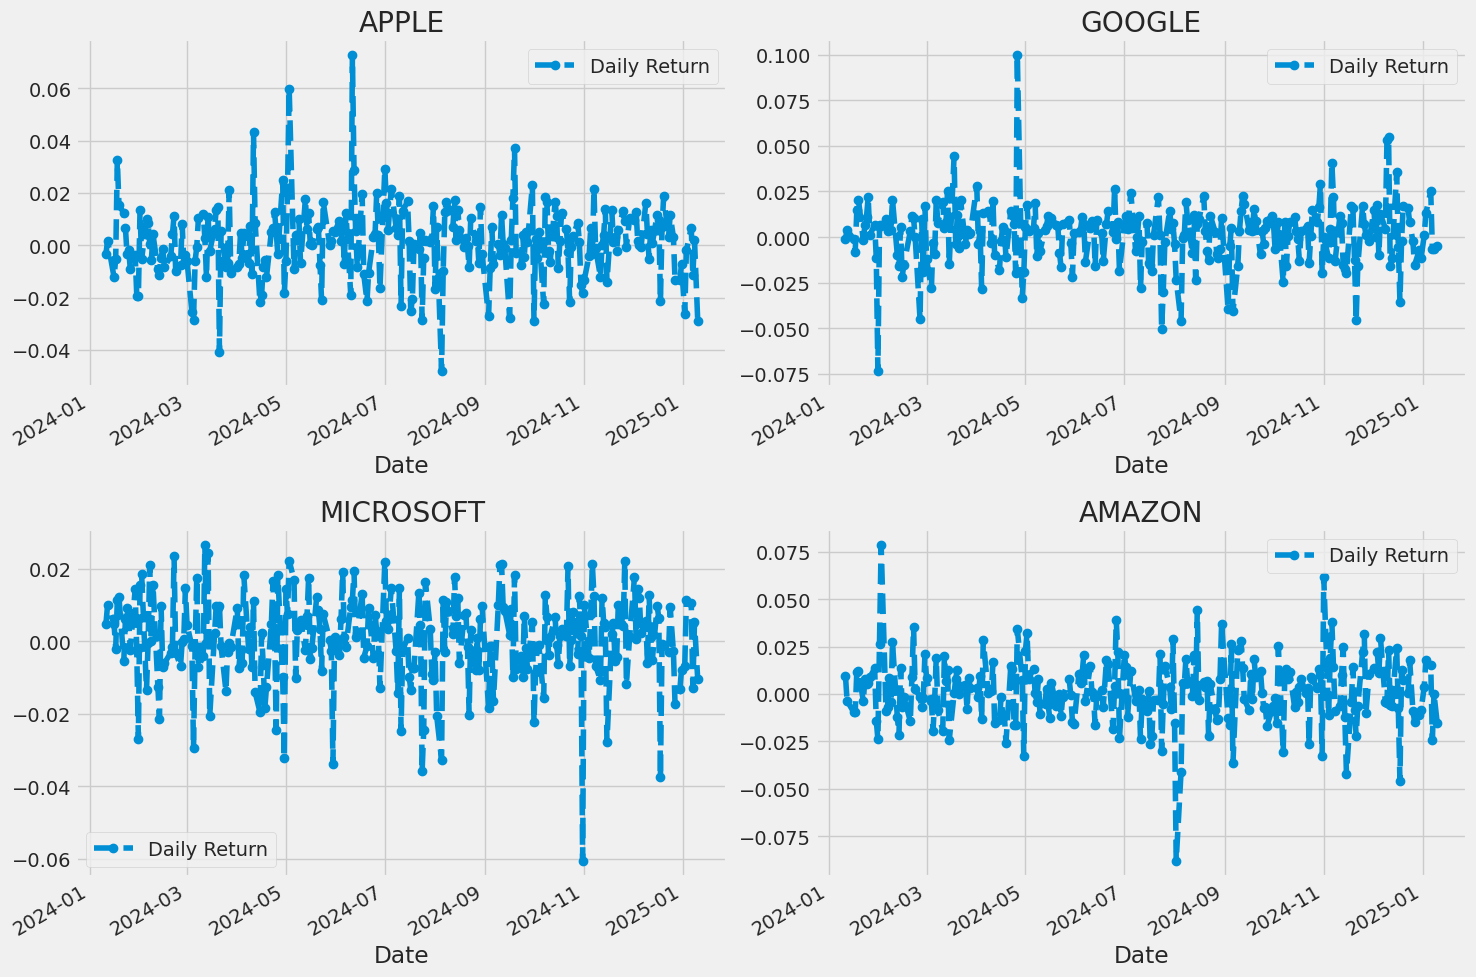

In [17]:
# Calculate daily return for the combined DataFrame
df['Daily Return'] = df.groupby('company_name')['Adj Close'].pct_change()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for ax, company in zip(axes.flatten(), company_name):
    company_data = df[df['company_name'] == company]
    company_data['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(company)

fig.tight_layout()
plt.show()


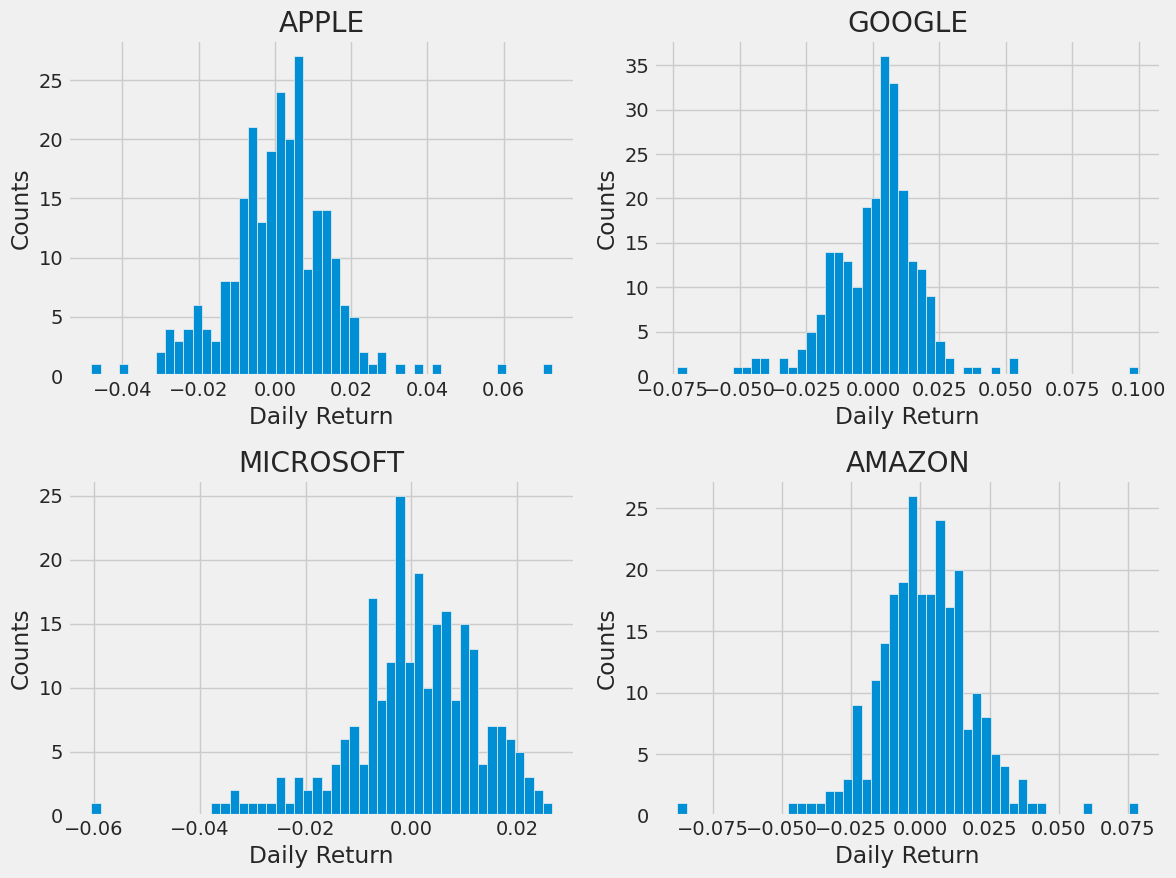

In [18]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [20]:
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Calculating percentage change
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN
2024-01-11 00:00:00+00:00,-0.003223,0.009432,-0.000904,0.004859
2024-01-12 00:00:00+00:00,0.001778,-0.003609,0.003967,0.009984
2024-01-16 00:00:00+00:00,-0.012317,-0.009442,-0.001109,0.004634
2024-01-17 00:00:00+00:00,-0.005173,-0.009467,-0.008259,-0.002050


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


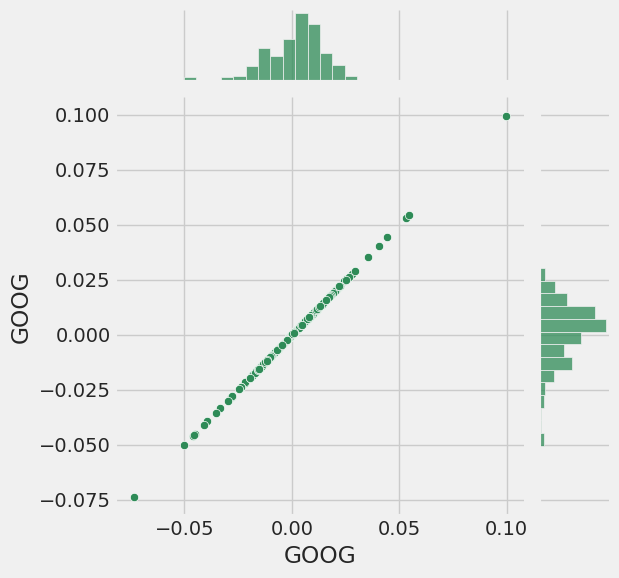

In [21]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


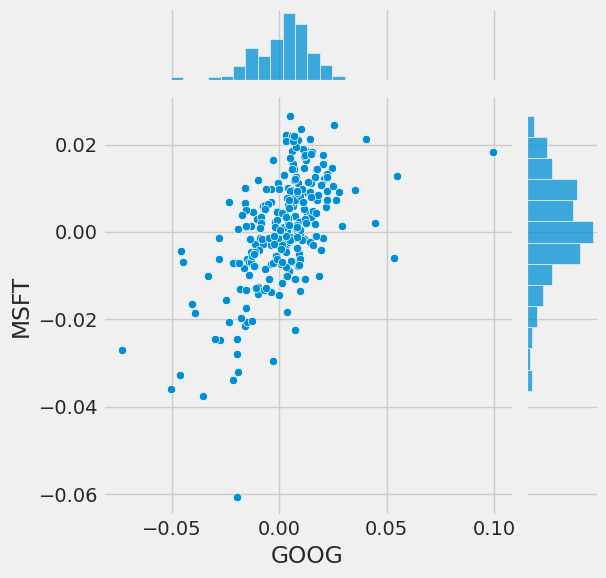

In [26]:
clean_tech_rets = tech_rets.replace([np.inf, -np.inf], np.nan).dropna()

sns.jointplot(x='GOOG', y='MSFT', data=clean_tech_rets, kind='scatter')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

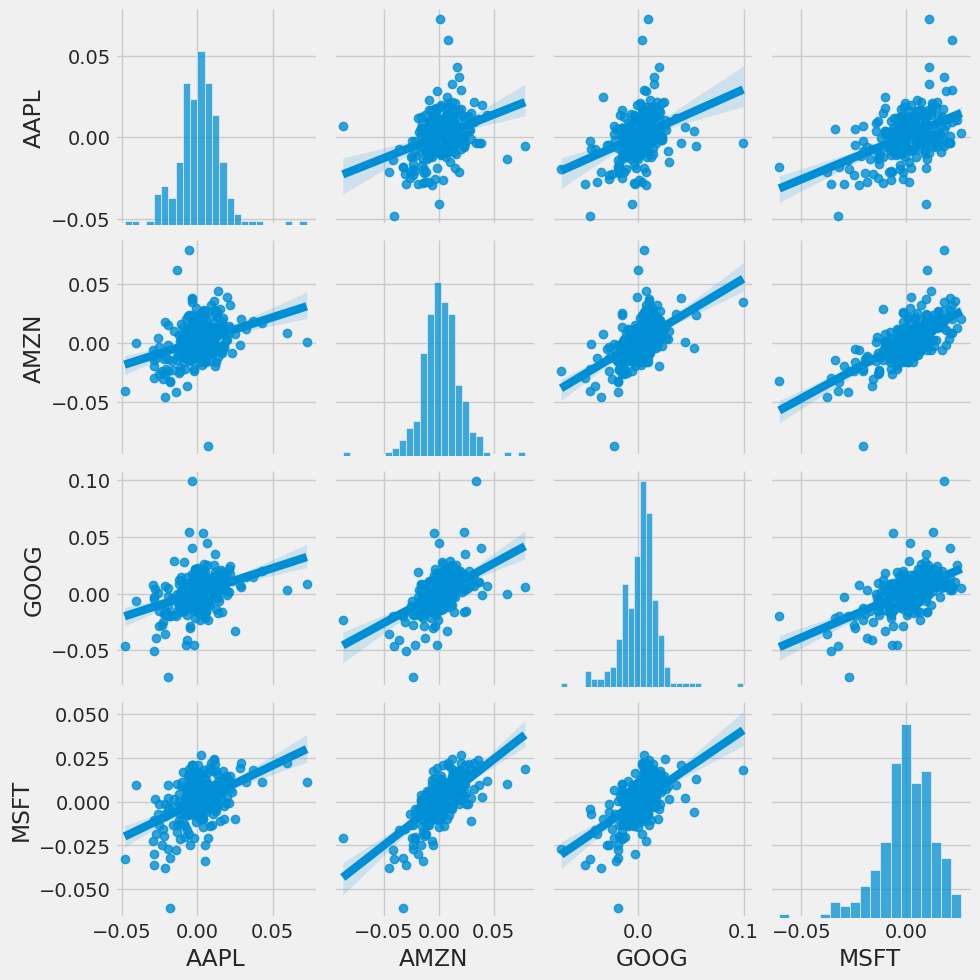

In [23]:
sns.pairplot(tech_rets, kind='reg')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

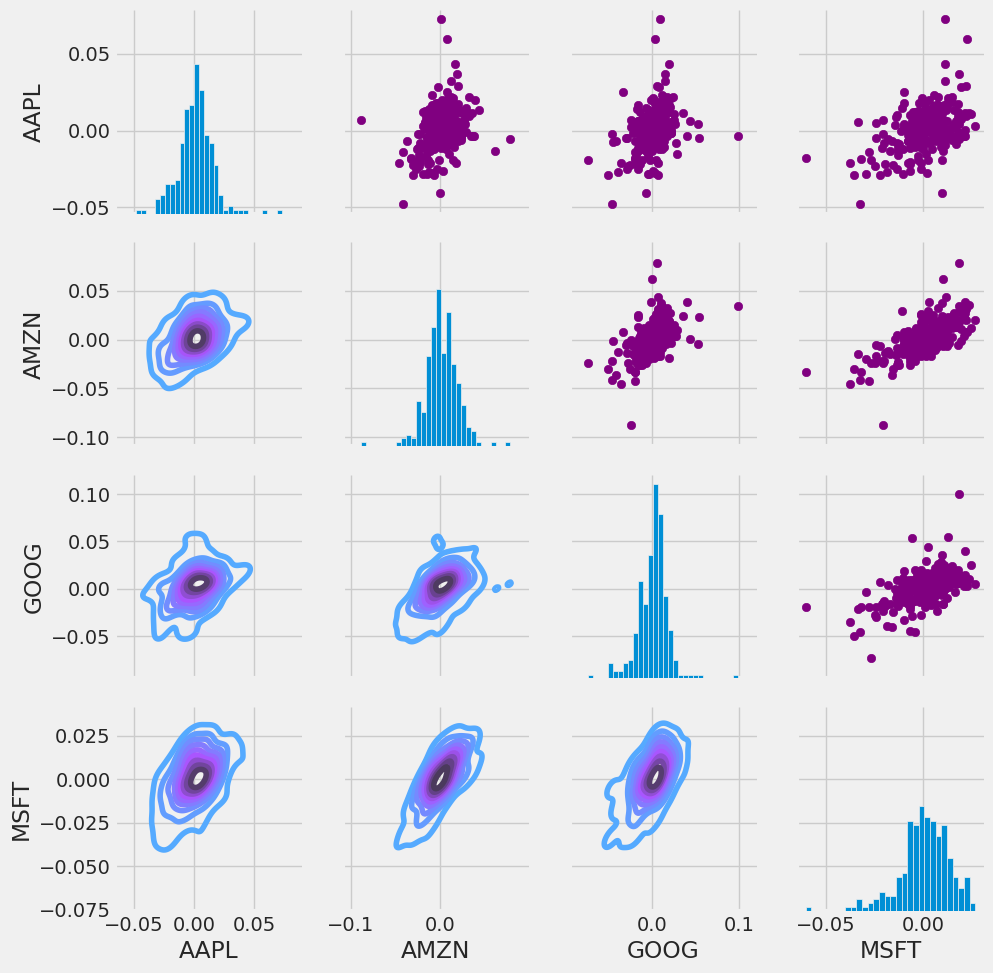

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

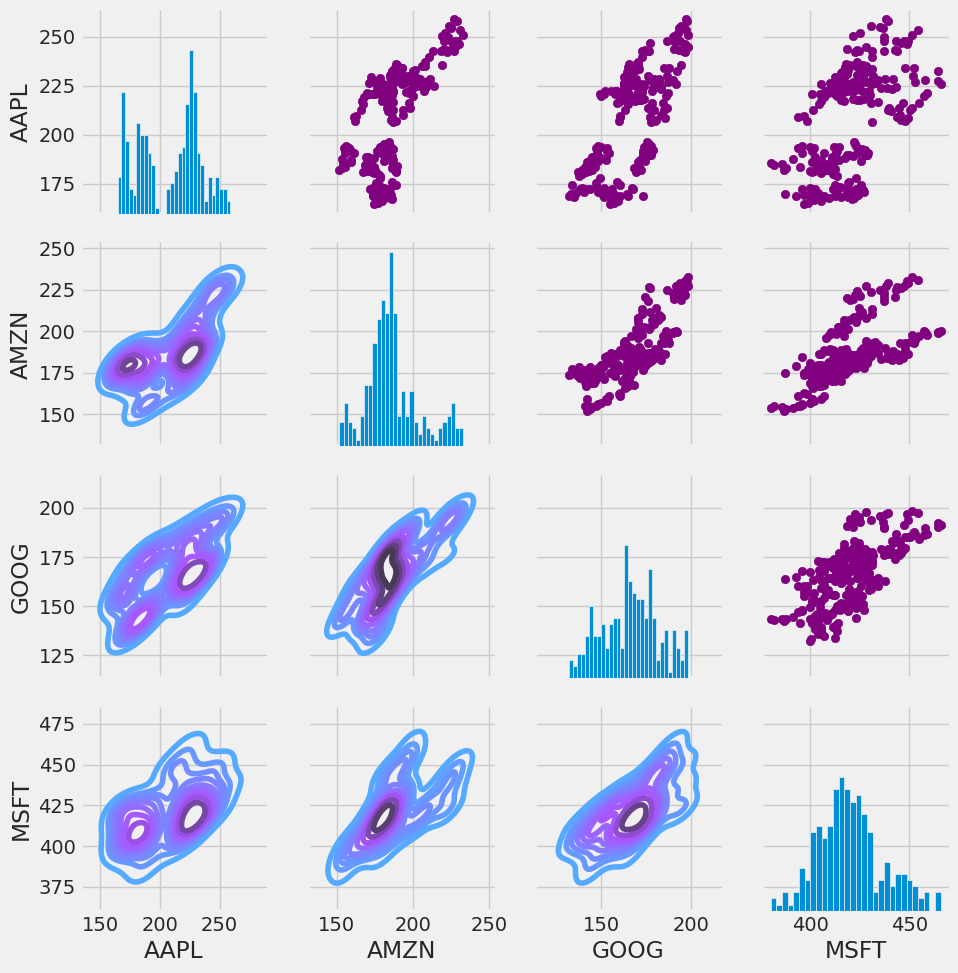

In [27]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

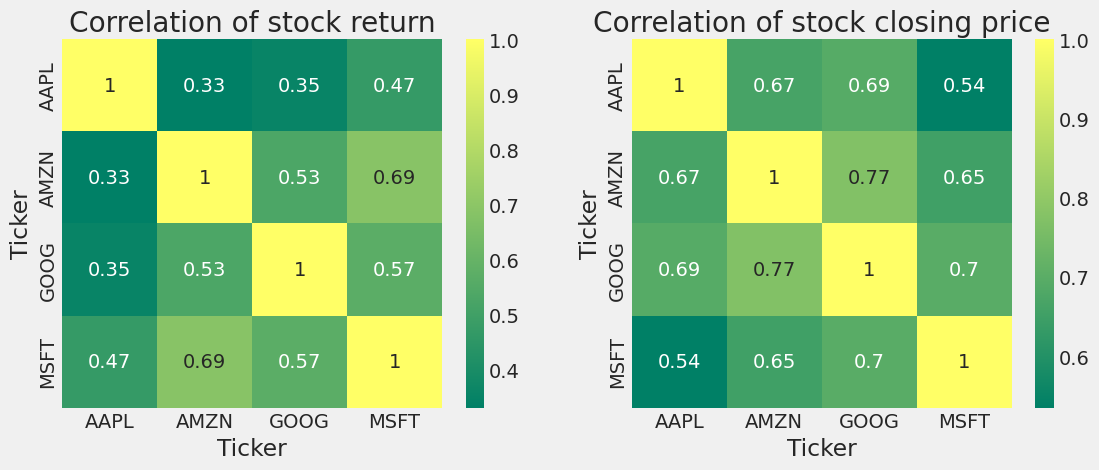

In [28]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

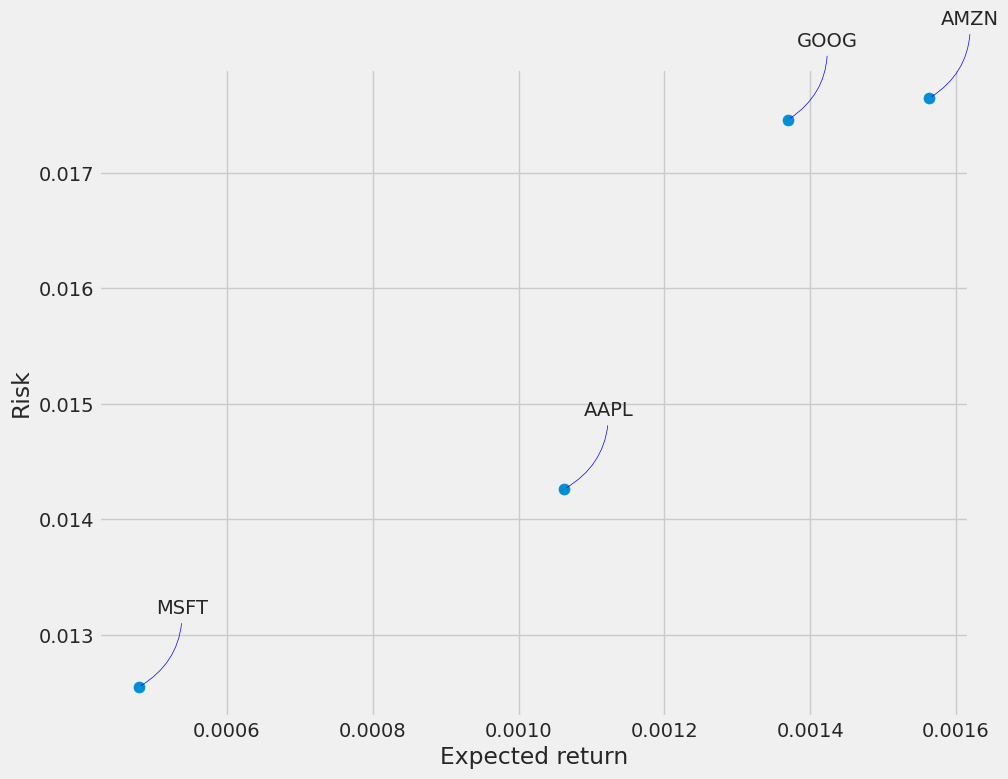

In [29]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [38]:
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Show the data
print(df)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.388998   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.455578   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.593858   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.725513   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.705327   
...                ...         ...         ...         ...         ...   
2025-01-03  243.360001  244.179993  241.889999  243.360001  243.360001   
2025-01-06  244.309998  247.330002  243.199997  245.000000  245.000000   
2025-01-07  242.979996  245.550003  241.350006  242.210007  242.210007   
2025-01-08  241.919998  243.710007  240.050003  242.699997  242.699997   
2025-01-10  240.024994  240.149994  233.000000  236.024994  236.024994   

               Volume  
Date         

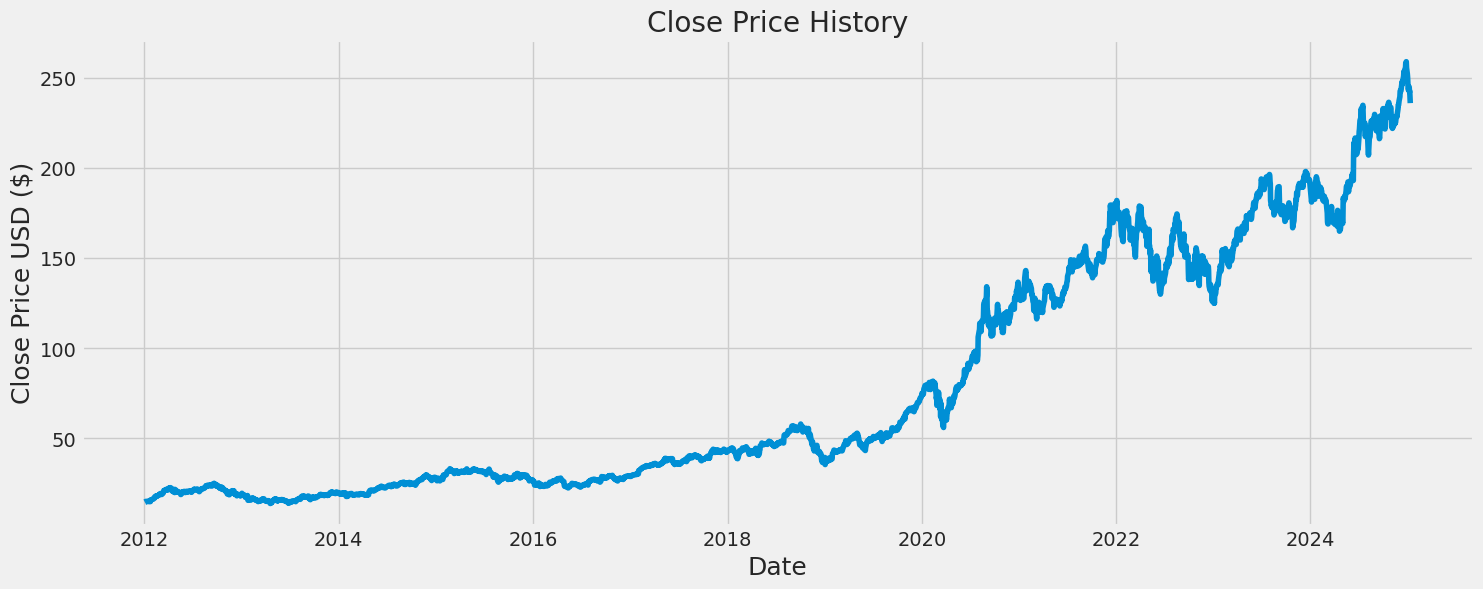

In [39]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [42]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3113

In [43]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0030166 ],
       [0.00333866],
       [0.00400756],
       ...,
       [0.93140812],
       [0.93340749],
       [0.90617064]])

In [44]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0030166 , 0.00333866, 0.00400756, 0.0046444 , 0.00454676,
       0.00476681, 0.00466626, 0.00449721, 0.00426696, 0.00497958,
       0.00562224, 0.00542405, 0.00433836, 0.0053745 , 0.0043544 ,
       0.00817979, 0.00788397, 0.00827015, 0.00910518, 0.00961086,
       0.00956859, 0.00941267, 0.01007719, 0.01070237, 0.01141062,
       0.0125546 , 0.01495767, 0.0149941 , 0.0163319 , 0.0173316 ,
       0.01561346, 0.01627507, 0.01626195, 0.01811709, 0.01785332,
       0.01834151, 0.0192188 , 0.019707  , 0.02111329, 0.02213776,
       0.02243359, 0.02253706, 0.0207854 , 0.02036278, 0.02042544,
       0.02207219, 0.02253561, 0.02353094, 0.02587718, 0.02900745,
       0.02842162, 0.02842307, 0.03068626, 0.03139451, 0.03089027,
       0.03042977, 0.02995032, 0.03154314, 0.03263612, 0.03309371])]
[0.03196284432003735]

[array([0.0030166 , 0.00333866, 0.00400756, 0.0046444 , 0.00454676,
       0.00476681, 0.00466626, 0.00449721, 0.00426696, 0.00497958,
       0.00562224, 0.00542405, 0.00

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3053/3053 ━━━━━━━━━━━━━━━━━━━━ 86s 28ms/step - loss: 0.0018


In [46]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


5.299176014416567

<ipython-input-36-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


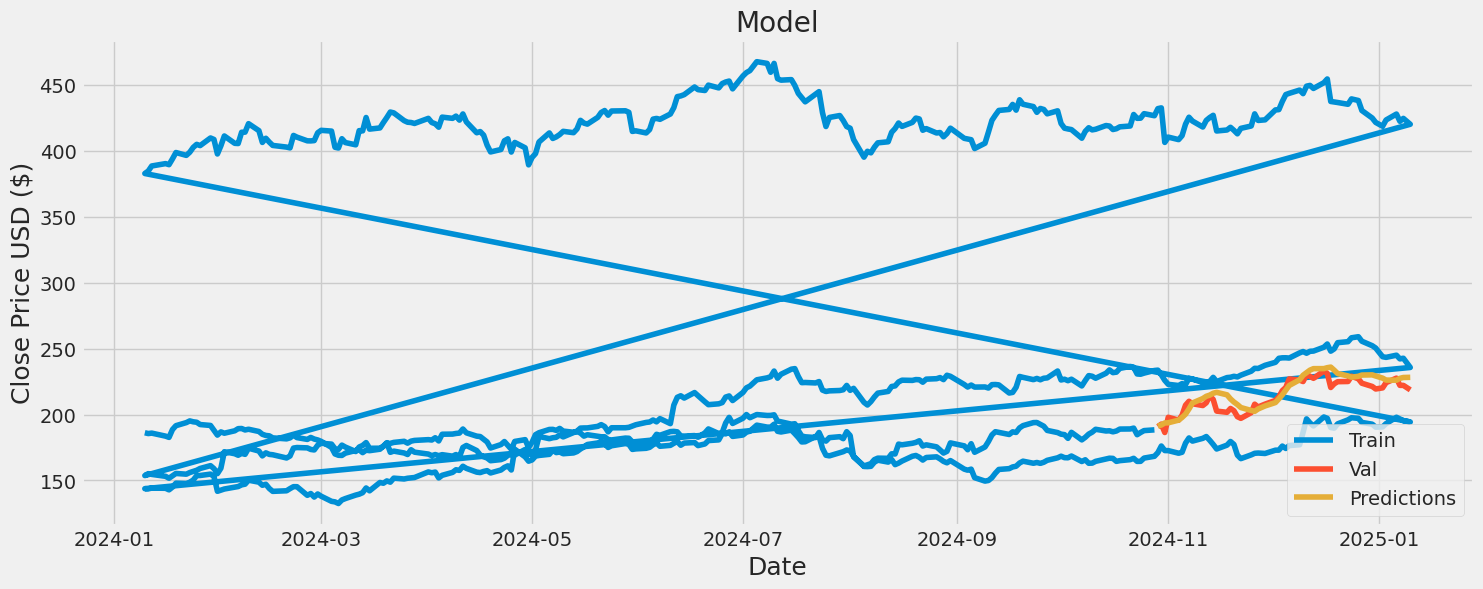

In [36]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
valid

,Close,Predictions
Date,,
2024-10-29,190.830002,191.242401
2024-10-30,192.729996,192.091309
2024-10-31,186.399994,193.627029
2024-11-01,197.929993,193.756439
2024-11-04,195.779999,195.762238
2024-11-05,199.500000,197.819016
2024-11-06,207.089996,200.319794
2024-11-07,210.050003,204.253845
2024-11-08,208.179993,208.761032
